In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def day_type(x):
    if x == 6 or x == 0:
        return 1
    else:
        return 0

In [50]:
train_raw = pd.read_csv('../data/train-parking.csv', parse_dates = [[3,4]], infer_datetime_format=True)
train_raw['Minute'] = train_raw.Date_Time.dt.minute
train_raw['Hour'] = train_raw.Date_Time.dt.hour
train_raw['Dow'] = train_raw.Date_Time.dt.weekday
train_raw['Year'] = train_raw.Date_Time.dt.year
train_raw['Month'] = train_raw.Date_Time.dt.month
train_raw['isweekend'] = train_raw['Dow'].apply(day_type)

In [3]:
test_raw = pd.read_csv('../data/test-no-label-parking.csv', parse_dates = [[3,4]], infer_datetime_format=True)
test_raw['Minute'] = test_raw.Date_Time.dt.minute
test_raw['Hour'] = test_raw.Date_Time.dt.hour
test_raw['Dow'] = test_raw.Date_Time.dt.weekday
test_raw['Year'] = test_raw.Date_Time.dt.year
test_raw['Month'] = test_raw.Date_Time.dt.month
test_raw['isweekend'] = test_raw['Dow'].apply(day_type)

In [4]:
test_raw.head()

,Date_Time,Street,From,To,Street.Length,Minute,Hour,Dow,Year,Month,isweekend
0,2014-03-28 16:34:00,Stockton Street,Stockton Tunnel,Stockton Street,35.786472,34,16,4,2014,3,0
1,2014-03-28 21:34:00,Van Ness Avenue,Hayes Street,Van Ness Avenue,63.787968,34,21,4,2014,3,0
2,2014-03-28 19:50:00,Van Ness Avenue,McAllister Street,Van Ness Avenue,56.007236,50,19,4,2014,3,0
3,2014-03-28 20:02:00,Mission Street,11th Street,Mission Street,139.651900,2,20,4,2014,3,0
4,2014-03-28 19:43:00,Hyde Street,Golden Gate Avenue,McAllister Street,105.144110,43,19,4,2014,3,0


In [17]:
train_raw['date'] = train_raw.Date_Time.dt.date
test_raw['date'] = test_raw.Date_Time.dt.date

In [24]:
train_raw.shape,test_raw.shape

((1100, 14), (726, 12))

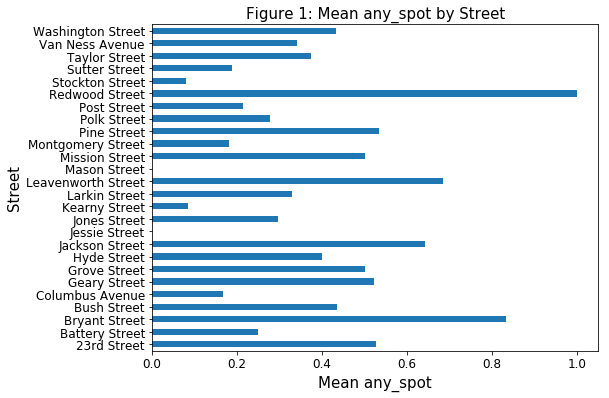

In [124]:
street_mean = train_raw.groupby(['Street'])['any_spot'].mean().plot('barh',figsize = (8,6),fontsize = 12)
plt.xlabel('Mean any_spot',fontsize = 15)
plt.ylabel('Street',fontsize = 15)
plt.title('Figure 1: Mean any_spot by Street', fontsize = 15)

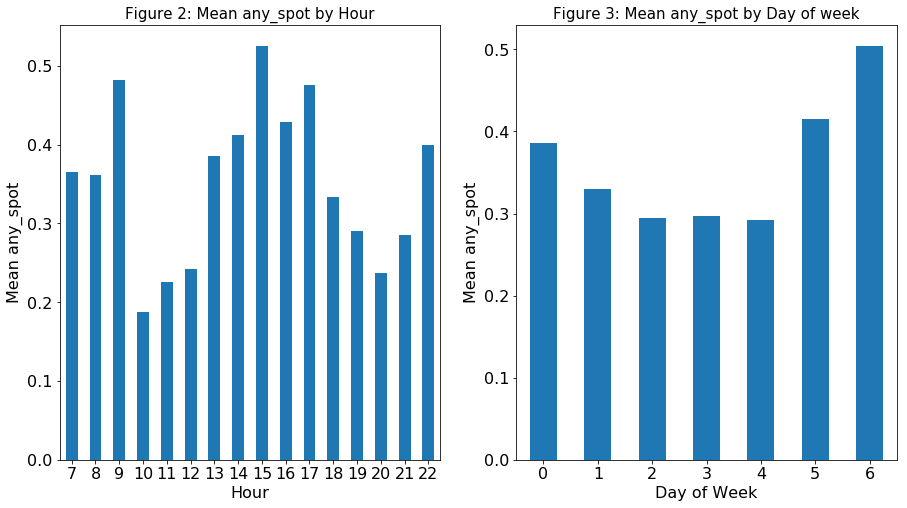

In [125]:
plt.figure(figsize = (15,8))
plt.subplot(121)
street_mean = train_raw.groupby(['Hour'])['any_spot'].mean().plot('bar', rot = 0,fontsize = 16)
plt.xlabel('Hour',fontsize = 16)
plt.ylabel('Mean any_spot',fontsize = 16)
plt.title('Figure 2: Mean any_spot by Hour', fontsize = 15)
plt.subplot(122)
street_mean = train_raw.groupby(['Dow'])['any_spot'].mean().plot('bar', rot = 0,fontsize = 16)
plt.xlabel('Day of Week',fontsize = 16)
plt.ylabel('Mean any_spot',fontsize = 16)
plt.title('Figure 3: Mean any_spot by Day of week', fontsize = 15)

### Geo Features

In [129]:
train_geo = pd.read_csv('../data/train_longlat.csv')
train_latlng = train_geo[['lat','lng']]
train_latlng.head()

,lat,lng
0,37.750648,-122.418316
1,37.784040,-122.419381
2,37.785660,-122.421476
3,37.788499,-122.421892
4,37.787084,-122.421757


In [132]:
sensor_geo = pd.read_csv('../data/sensor_longlat.csv')
sensor_latlng = sensor_geo[['lat','lng']]
sensor_latlng.head()

,lat,lng
0,37.790007,-122.433902
1,37.791769,-122.434188
2,37.797099,-122.398361
3,37.796735,-122.399910
4,37.782793,-122.467643


In [338]:
park_geo = pd.read_csv('../data/parkingrecords.csv')[['lat','lon']]
park_latlng = pd.DataFrame({'lat':park_geo.lat, 'lng': park_geo.lon})
park_latlng = park_latlng.drop_duplicates()

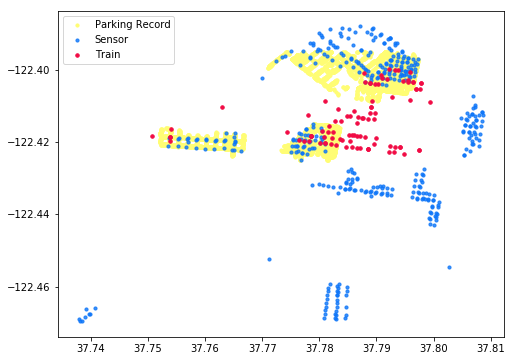

In [404]:
plt.figure(figsize = (8,6))
plt.scatter(park_latlng.lat,park_latlng.lng,c = '#fffd74',alpha=1, s=10)
plt.scatter(sensor_latlng.lat,sensor_latlng.lng,c = '#0d75f8',alpha=0.8, s=10)
plt.scatter(train_latlng.lat,train_latlng.lng,c = '#f10c45',alpha=1, s=12)
plt.legend(['Parking Record','Sensor','Train'])

In [209]:
train_latlng.describe()

,lat,lng
count,96.000000,96.000000
mean,37.785942,-122.413758
std,0.009961,0.007197
min,37.750648,-122.423180
25%,37.782333,-122.419683
50%,37.787795,-122.416725
75%,37.792295,-122.408122
max,37.799464,-122.399797


In [339]:
#Setting a limit to where we want to see these data
lat_min = 37.745
lat_max = 37.802
lng_min = -122.425
lng_max = -122.395

In [372]:
park_filter = park_latlng[(park_latlng.lat>=lat_min) & (park_latlng.lat <= lat_max) &(park_latlng.lng>=lng_min) & (park_latlng.lng <= lng_max)]

In [262]:
sensor_filter = sensor_latlng[(sensor_latlng.lat>=lat_min) & (sensor_latlng.lat <= lat_max) &(sensor_latlng.lng>=lng_min) & (sensor_latlng.lng <= lng_max)]

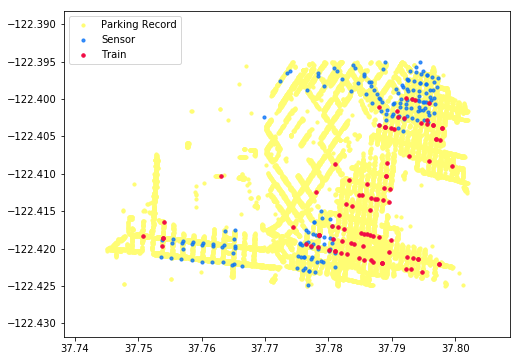

In [403]:
plt.figure(figsize = (8,6))
plt.scatter(park_filter.lat,park_filter.lng,c = '#fffd74',alpha=1, s=10)
plt.scatter(sensor_filter.lat,sensor_filter.lng,c = '#0d75f8',alpha=0.8, s=10)
plt.scatter(train_latlng.lat,train_latlng.lng,c = '#f10c45',alpha=1, s=12)
plt.legend(['Parking Record','Sensor','Train'])

In [266]:
pr = pd.read_csv('../data/park_rec_dt_217.csv')

pr_filtered = pr[(pr.lat>=lat_min) & (pr.lat <= lat_max) &(pr.lon>=lng_min) & (pr.lon <= lng_max)]

pr_filtered.head()

,lat,lon,Date_Time,Minute,Hour,Dow,Time,isweekend
13,37.756761,-122.419010,2016-06-28 16:04:16,4,16,1,1604,0
14,37.758658,-122.418486,2016-06-28 17:04:59,4,17,1,1704,0
21,37.796008,-122.400311,2016-07-16 18:56:58,56,18,5,1856,0
22,37.768435,-122.414295,2016-07-18 08:59:07,59,8,0,859,1
37,37.781675,-122.401493,2016-09-11 12:05:08,5,12,6,1205,1


In [251]:
pr_unique = pr_filtered[['lat','lon']]
pr_unique = pr_unique.drop_duplicates()

In [ ]:
#Meter Map

In [336]:
metermap= pd.read_csv('../data/metermap.csv')

In [337]:
metermap.head()

,POST_ID,MS_ID,MS_SPACEID,CAP_COLOR,METER_TYPE,SMART_METE,ACTIVESENS,JURISDICTI,ON_OFF_STR,OSP_ID,STREET_NUM,STREETNAME,STREET_SEG,RATEAREA,SFPARKAREA,LOCATION
0,354-20160,-,0,Grey,SS,Y,N,SFMTA,ON,0,2016,CHESTNUT ST,3977000,Area 5,Marina,"(37.8007983983, -122.4368696024)"
1,354-21030,-,0,Green,SS,Y,N,SFMTA,ON,0,2103,CHESTNUT ST,3979000,Area 5,Marina,"(37.8005223990, -122.4380665996)"
2,354-21160,-,0,Yellow,SS,Y,N,SFMTA,ON,0,2116,CHESTNUT ST,3979000,Area 5,Marina,"(37.8005888005, -122.4385250003)"
3,363-05250,-,0,Grey,SS,N,N,SFMTA,ON,0,525,COLUMBUS AVE,4295000,Area 3,NaN,"(37.8000532974, -122.4099854023)"
4,363-05270,-,0,Grey,SS,N,N,SFMTA,ON,0,527,COLUMBUS AVE,4295000,Area 3,NaN,"(37.8000875012, -122.4100349003)"


In [357]:
park_filter['lat'] = round(park_filter['lat'],4)
park_filter['lng'] = round(park_filter['lng'],4)

/Users/Grace/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Grace/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [342]:
def splitloc(string):
    string = string.strip('(').strip(')').split(',')
    lat = round(float(string[0]),5)
    lng = round(float(string[1]),5)
    return (lat,lng)

In [343]:
metermap['loc'] = metermap['LOCATION'].apply(splitloc) 

In [358]:
metermap['lat'] = metermap['loc'].map(lambda x: round(x[0],4))
metermap['lng'] = metermap['loc'].map(lambda x: round(x[1],4))

In [345]:
metermap= metermap.drop(['LOCATION'],axis =1)

In [359]:
metermap.describe()`

,MS_SPACEID,OSP_ID,STREET_NUM,STREET_SEG,lat,lng
count,29360.000000,29360.000000,29360.000000,2.936000e+04,29360.000000,29360.000000
mean,1.972820,23.406097,1105.283719,7.103452e+06,37.778378,-122.421250
std,8.378476,143.789457,1176.191248,4.088187e+06,0.018341,0.024692
min,0.000000,0.000000,0.000000,1.000000e+05,37.711300,-122.499300
25%,0.000000,0.000000,262.000000,3.790000e+06,37.771300,-122.432400
50%,0.000000,0.000000,632.000000,7.033000e+06,37.782500,-122.417100
75%,0.000000,0.000000,1610.250000,1.054800e+07,37.790100,-122.402700
max,98.000000,923.000000,6325.000000,1.998900e+07,37.808500,-122.385300


In [362]:
merge = pd.merge(park_filter, metermap, how = 'left', left_on=['lat','lng'], right_on=['lat','lng'])

In [363]:
merged_na = merge.dropna()
merged_na = merged_na.drop_duplicates()

In [369]:
merged_na.head()

,lat,lng,POST_ID,MS_ID,MS_SPACEID,CAP_COLOR,METER_TYPE,SMART_METE,ACTIVESENS,JURISDICTI,ON_OFF_STR,OSP_ID,STREET_NUM,STREETNAME,STREET_SEG,RATEAREA,SFPARKAREA,loc
2,37.7960,-122.4003,720-03680,-,0.0,Yellow,SS,Y,N,SFMTA,ON,0.0,368.0,WASHINGTON ST,13406000.0,Area 5,Downtown,"(37.79597, -122.40027)"
4,37.7817,-122.4015,418-08150,-,0.0,Grey,SS,N,N,SFMTA,ON,0.0,815.0,FOLSOM ST,5664000.0,Area 5,South Embarcadero,"(37.78166, -122.40146)"
44,37.7847,-122.3976,418-06330,-,0.0,Grey,SS,Y,N,SFMTA,ON,0.0,633.0,FOLSOM ST,5660000.0,Area 5,South Embarcadero,"(37.78474, -122.39756)"
68,37.7927,-122.3975,380-00010,-,0.0,Grey,SS,N,N,SFMTA,ON,0.0,1.0,DAVIS ST,4605000.0,Area 5,Downtown,"(37.79267, -122.39752)"
69,37.7927,-122.3975,380-00030,-,0.0,Grey,SS,N,N,SFMTA,ON,0.0,3.0,DAVIS ST,4605000.0,Area 5,Downtown,"(37.79272, -122.39753)"


In [382]:
merged_meter = merged_na[['lat', 'lng', 'STREET_NUM', 'STREETNAME','SFPARKAREA', 'loc']]

In [373]:
park_filter['lat4'] = round(park_filter['lat'],4)
park_filter['lng4'] = round(park_filter['lng'],4)

/Users/Grace/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Grace/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [383]:
merge2 = pd.merge(park_filter, merged_meter, how = 'left', left_on=['lat4','lng4'], right_on=['lat','lng'])

In [386]:
merge2_na = merge2.dropna()

In [387]:
merge2_na

,lat_x,lng_x,lat4,lng4,lat_y,lng_y,STREET_NUM,STREETNAME,SFPARKAREA,loc
2,37.796008,-122.400311,37.7960,-122.4003,37.7960,-122.4003,368.0,WASHINGTON ST,Downtown,"(37.79597, -122.40027)"
4,37.781675,-122.401493,37.7817,-122.4015,37.7817,-122.4015,815.0,FOLSOM ST,South Embarcadero,"(37.78166, -122.40146)"
43,37.784683,-122.397640,37.7847,-122.3976,37.7847,-122.3976,633.0,FOLSOM ST,South Embarcadero,"(37.78474, -122.39756)"
66,37.792694,-122.397517,37.7927,-122.3975,37.7927,-122.3975,1.0,DAVIS ST,Downtown,"(37.79267, -122.39752)"
67,37.792694,-122.397517,37.7927,-122.3975,37.7927,-122.3975,3.0,DAVIS ST,Downtown,"(37.79272, -122.39753)"
68,37.793997,-122.398985,37.7940,-122.3990,37.7940,-122.3990,219.0,FRONT ST,Downtown,"(37.79397, -122.39899)"
84,37.789421,-122.405262,37.7894,-122.4053,37.7894,-122.4053,252.0,GRANT AVE,Downtown,"(37.78939, -122.40529)"
114,37.781787,-122.401611,37.7818,-122.4016,37.7818,-122.4016,816.0,FOLSOM ST,South Embarcadero,"(37.78179, -122.40161)"
117,37.774197,-122.395251,37.7742,-122.3953,37.7742,-122.3953,273.0,BERRY ST,South Embarcadero,"(37.7742, -122.39525)"
118,37.774197,-122.395251,37.7742,-122.3953,37.7742,-122.3953,275.0,BERRY ST,South Embarcadero,"(37.77416, -122.3953)"


In [388]:
merge2_na.shape

(15247, 10)

In [398]:
ll = merge2_na[['lat_x','lng_x']]

In [399]:
ll = ll.drop_duplicates()

In [401]:
ll.shape

(6571, 2)

In [405]:
from sklearn.cluster import KMeans
spots = np.vstack(train_latlng[['lat','lng']].values)
kmeans = KMeans().fit(spots)
train_latlng['street_cluster'] = kmeans.predict(train_latlng[['lat', 'lng']])
park_filter['street_cluster'] = kmeans.predict(park_filter[['lat', 'lng']])

/Users/Grace/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Grace/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


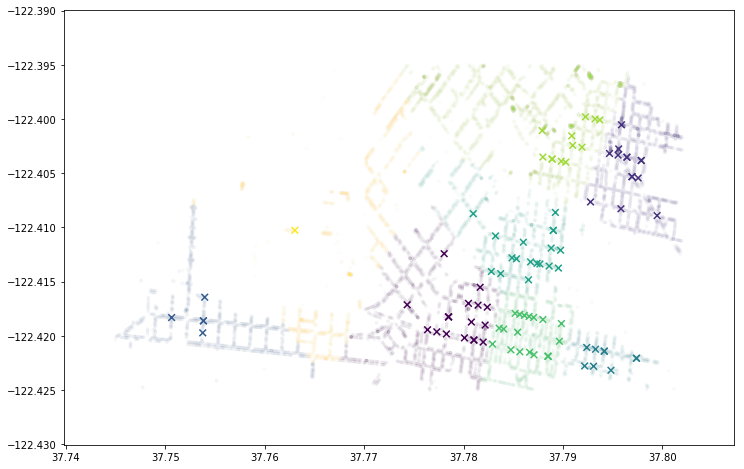

In [415]:
plt.figure(figsize = (12,8))
plt.scatter(park_filter.lat,park_filter.lng,c = park_filter.street_cluster,alpha=0.02, s=8)
plt.scatter(train_latlng.lat,train_latlng.lng,c = train_latlng.street_cluster,alpha=1,marker = 'x', s=45)